## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
stock.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [4]:
stock.tail()

,Interest Rates,Employment,S&P 500 Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [5]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Interest Rates    1000 non-null float64
Employment        1000 non-null float64
S&P 500 Price     1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


## Visualize the data

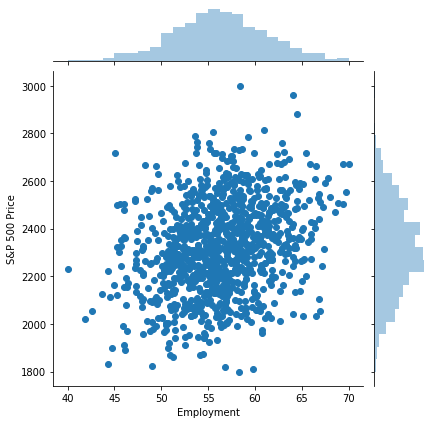

In [7]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=stock)

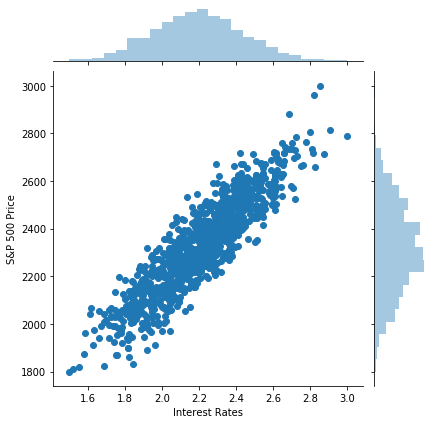

In [8]:
sns.jointplot(x='Interest Rates', y='S&P 500 Price', data=stock)

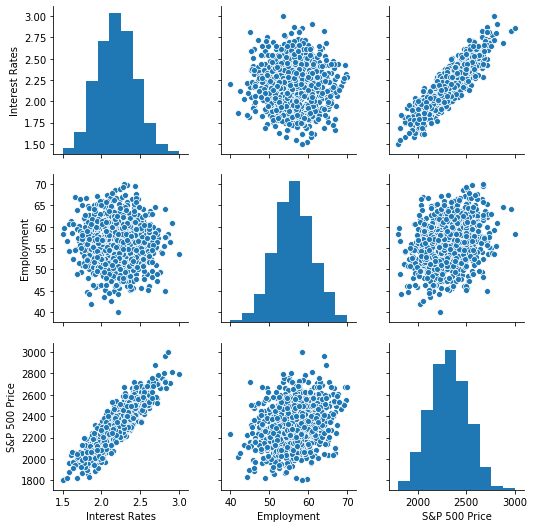

In [9]:
sns.pairplot(stock)

## Create Training and Testing data

In [10]:
y = stock['S&P 500 Price']

In [11]:
y.shape

(1000,)

In [12]:
X = stock.drop(columns = 'S&P 500 Price')

In [13]:
X.shape

(1000, 2)

In [14]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [15]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape

(800, 2)

In [20]:
y_train.shape

(800,)

In [21]:
X_test.shape

(200, 2)

In [22]:
y_test.shape

(200,)

## Training the Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression(fit_intercept=True)

In [25]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Linear Model coef (m)', regressor.coef_)
print('Linear Model coef (b)', regressor.intercept_)

Linear Model coef (m) [725.76128865  12.11234327]
Linear Model coef (b) 45.065297089167416


##  Evaluating The Model

In [27]:
y_predict = regressor.predict(X_test)

In [28]:
y_predict

array([1975.58404492, 2116.95366758, 2428.07200472, 2372.70139556,
       2395.55089946, 2271.54559157, 2610.18055858, 2550.85359532,
       2446.38440141, 1979.38789193, 2520.24134875, 2469.83034873,
       2418.56203447, 2409.63613052, 2276.52608705, 2038.85363286,
       2411.53279004, 2316.49135347, 2584.28905194, 2328.16301922,
       2471.75406207, 2082.25037848, 2359.93749169, 2129.6769184 ,
       2409.05661077, 2339.92290894, 2217.50758358, 2345.19158081,
       2316.87563538, 2405.24573348, 2662.26310936, 2522.22728681,
       2302.25342607, 2462.23100843, 2426.8012211 , 2369.41615818,
       2432.00121861, 2145.55522191, 2429.41209207, 2210.83426924,
       2190.50983391, 2625.31791573, 2369.91265658, 2286.81822192,
       2484.70648369, 2487.20138205, 2114.14232306, 2502.60312342,
       2118.71436579, 2419.37183971, 2100.34878976, 2475.60050347,
       2145.76562667, 1997.47586248, 2484.69714862, 2448.5111173 ,
       2076.19904691, 2114.32162738, 2634.70825229, 1913.36505

In [29]:
y_test

993    1922.893274
859    2077.045715
298    2286.002432
553    2397.280286
672    2341.632103
          ...     
679    2225.368249
722    2493.822027
215    2040.970859
653    2031.841984
150    2440.409300
Name: S&P 500 Price, Length: 200, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

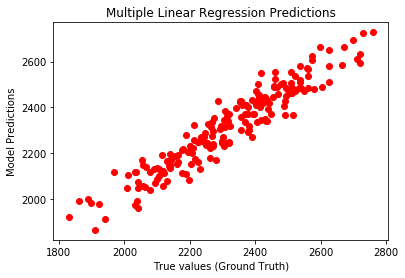

In [62]:
plt.scatter(y_test, y_predict, color='r')
plt.ylabel('Model Predictions')
plt.xlabel('True values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [31]:
k = X_test.shape[1]
n = len(X_test)

In [32]:
k

2

In [33]:
n

200

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test-y_predict)/ y_test))*100

In [39]:
print('RMSE = ', RMSE, '\nMSE = ',MSE ,'\nMAE = ',MAE ,'\nr2_score = ',r2 ,'\nadj_r2 = ',adj_r2 ,'\nMAPE = ',MAPE )

RMSE =  58.494 
MSE =  3421.512283136953 
MAE =  47.35790299728567 
r2_score =  0.9057245293112255 
adj_r2 =  0.9047674179336744 
MAPE =  2.061835885356791


## Visualize the result

In [43]:
#import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [45]:
x_surf, y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100), np.linspace(stock['Employment'].min(), stock['Employment'].max(), 100))

In [46]:
x_surf.shape

(100, 100)

In [47]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})

In [48]:
onlyX.shape

(10000, 2)

In [49]:
fittedY = regressor.predict(onlyX)

In [50]:
fittedY.shape

(10000,)

In [51]:
fittedY = fittedY.reshape(x_surf.shape)

In [52]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock Index Price')

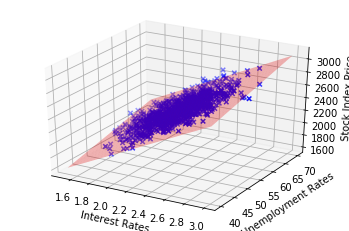

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(stock['Interest Rates'], stock['Employment'], stock['S&P 500 Price'], c='blue', marker='x')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')

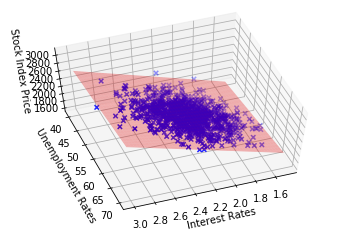

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(stock['Interest Rates'], stock['Employment'], stock['S&P 500 Price'], c='blue', marker='x')
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock Index Price')
ax.view_init(60, 70)
plt.show()

In [60]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])

In [61]:
coeff_df

,Coefficient
Interest Rates,725.761289
Employment,12.112343
